## Table of contents
#### Step 1: Importing libraries and the dataset
#### Step 2: Manipulations and reprocessing
#### Step 3: Using the elbow technique 
#### Step 4: Making an informed decision about the number of clusters
#### Step 5: Running the k-means algorithm
#### Step 6: Attaching a new column to the dataframe with the resulting clusters
#### Step 7 and 8: Creating a few visualizations (e.g., scatterplots) using the clustered data. Discussing how and why the clusters make sense
#### Step 9: Calculating the descriptive statistics for your clusters using the groupby() function and discussing your findings
#### Step 10: Proposing what these results could be useful for in future steps of an analytics pipeline

## Step 1: Importing libraries and the dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing data file by creating a path

path = r'C:\Users\Lenovo\Documents\Eva\Achievement 6'
df = pd.read_csv(os.path.join(path,'Project Achievement 6 Tornado_clean_statename.csv'), index_col = False)

In [4]:
# Checking the output

df.head()

,Unnamed: 0,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [5]:
# Deleting the first unnecessary column

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
# Rechecking the output

df.head()

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [7]:
df.shape

(67096, 15)

## Step 2: Manipulations and reprocessing

In [8]:
# Removing any categorical columns from your data by creating a subset

df_subset = df[['Injuries', 'Fatalities', 'Starting latitude', 'Starting longitude', 'Length of track', 'Width ']]

In [9]:
# Standardization 

# Defining standard scaler
scaler = StandardScaler()

# Transforming data
df_subset = scaler.fit_transform(df_subset)

## Step 3: Using the elbow technique 

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

[-402576.00000000023,
 -331046.1758579501,
 -276968.16624458635,
 -225144.84455363418,
 -199214.90545181357,
 -174489.54228898807,
 -154745.33543995788,
 -140478.17428740644,
 -129534.36519027763]

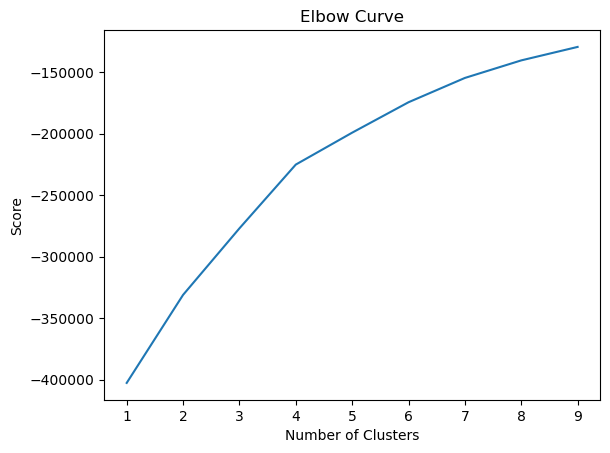

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Step 4: Making an informed decision about the number of clusters

Here, the curve straightens out after four numbers of clusters. This means that the optimal count for the clusters is four.

## Step 5: Running the k-means algorithm

In [13]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 4) 

In [14]:
# Fitting the k-means object to the dataframe

kmeans.fit(df_subset)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## Step 6: Attaching a new column to the dataframe with the resulting clusters

In [15]:
df['Cluster'] = kmeans.fit_predict(df_subset)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Checking the output

df.head()

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name,Cluster
0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois,1
1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri,1
2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio,1
3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas,1
4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois,0


In [17]:
df['Cluster'].value_counts()

1    31886
0    31553
3     3602
2       55
Name: Cluster, dtype: int64

In [18]:
# Exporting the file with the new column

df.to_csv(os.path.join(path, 'Project Achievement 6 Tornado_cluster.csv'))

## Step 7 and 8: Creating a few visualizations (e.g., scatterplots) using the clustered data. Discussing how and why the clusters make sense

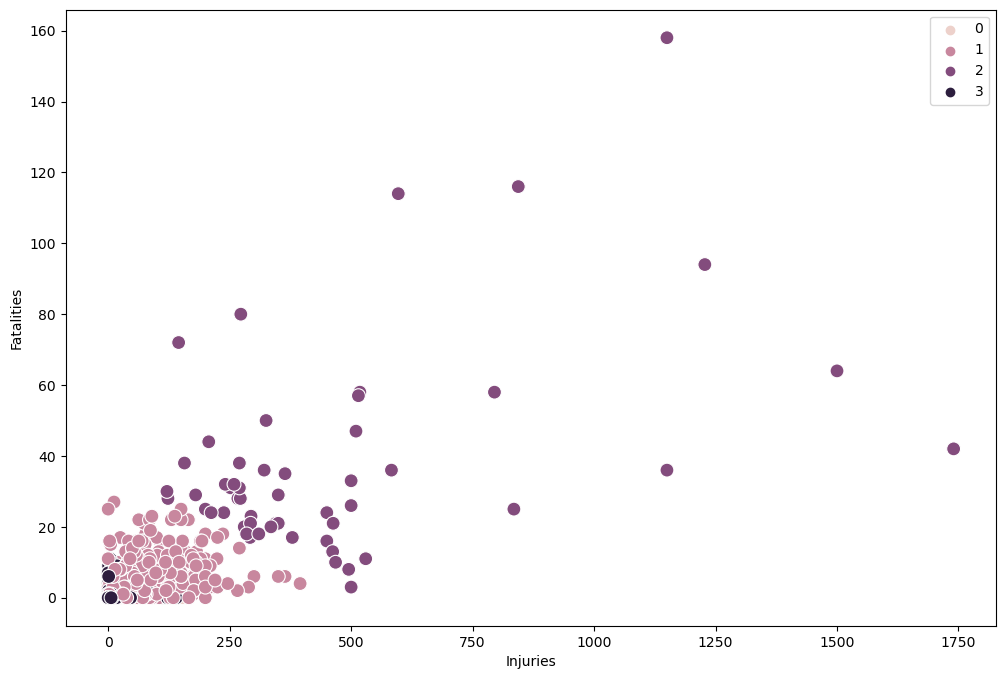

In [40]:
# Plotting the clusters for the "Injuries" and "Fatalities" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Injuries'], y=df['Fatalities'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Injuries') # Label x-axis.
plt.ylabel('Fatalities') # Label y-axis.
plt.show()

In this scatterplot, we can see that cluster 2 corresponds to the tornados that cause the most injuries and fatalities, cluster 1 consists of tornados causing a medium amount of injuries and fatalities, and cluster 3 corresponds to tornados that cause very little injuries and fatalities. Cluster 0 is not visible since it is only made up of 50 oberservations/tornados. 

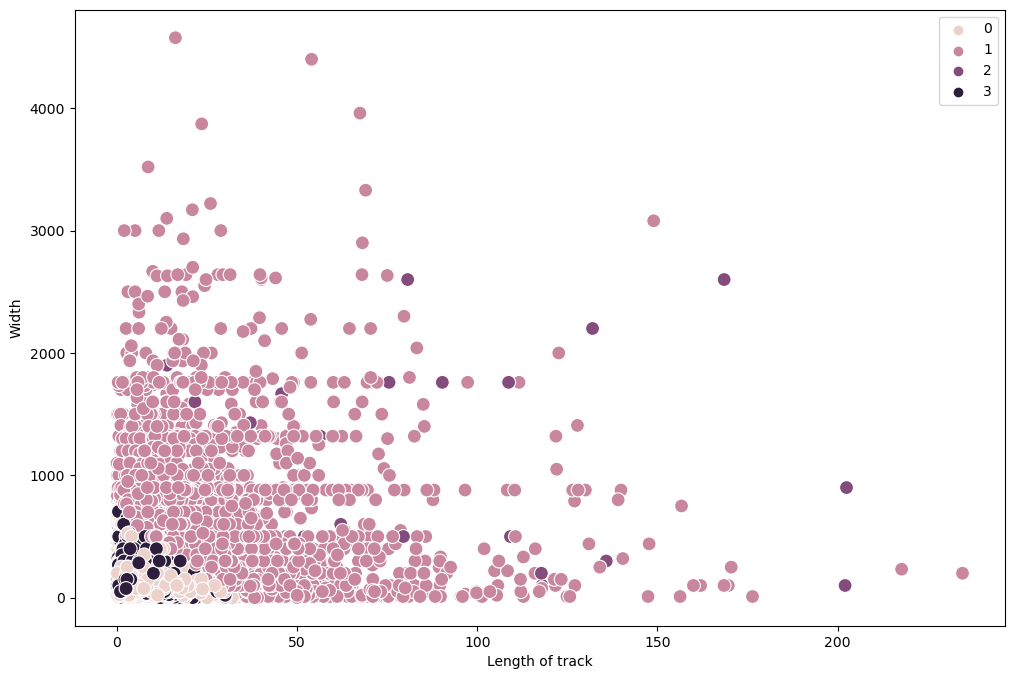

In [41]:
# Plotting the clusters for the "Length of track" and "Width" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length of track'], y=df['Width '], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of track') # Label x-axis.
plt.ylabel('Width') # Label y-axis.
plt.show()

Here, we can see that cluster 2 tornados (that cause the most injuries and fatalities) vary in length and width, while having a tendency to be bigger than the tornados of the other clusters (in length and width). Cluster 1 tornados (that cause a medium amount of injuries and fatalities) have a medium to high length and width. And finally, cluster 0 and cluster 3 tornados have a small length and width (and correspondingly cause little injuries and fatalities). 

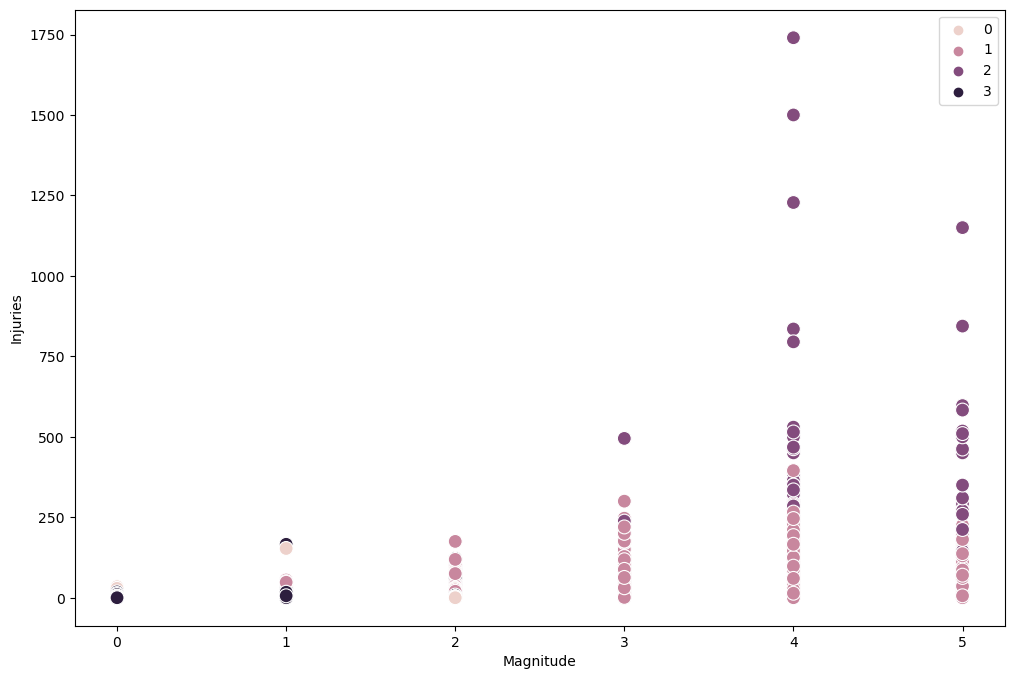

In [42]:
# Plotting the clusters for the "Magnitude" and "Injuries" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Magnitude'], y=df['Injuries'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Magnitude') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.show()

This scatterplot shows that tornados from cluster 0 and 3 have small magnitudes, tornados from cluster 1 have medium to high magnitudes and tornados from cluster 2 almost entirely have high magnitudes. This corresponds to the results in relation to width and length of track.

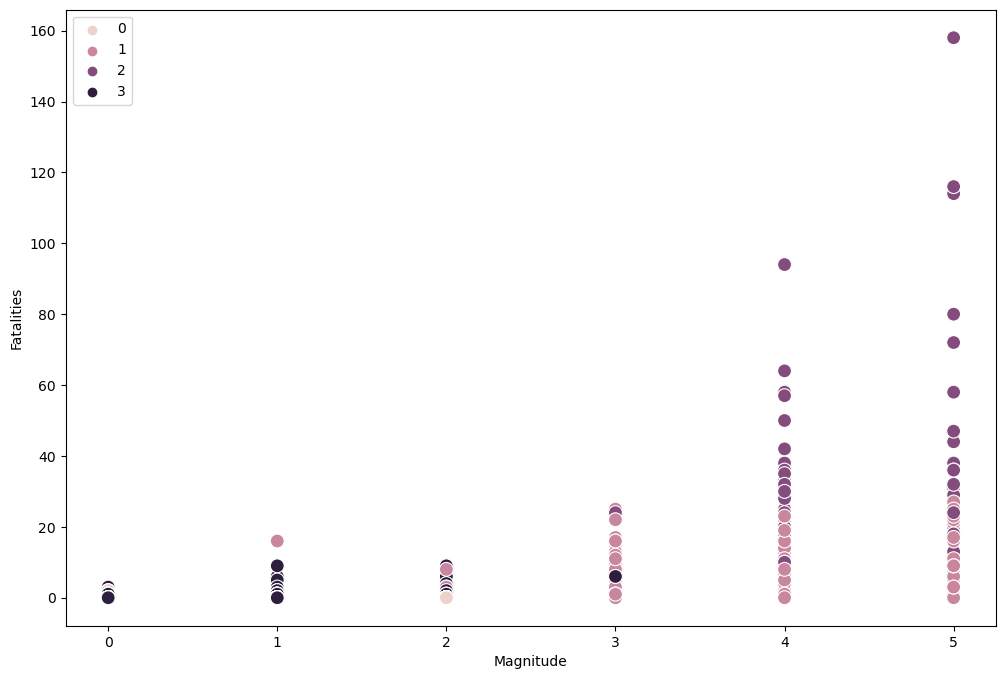

In [43]:
# Plotting the clusters for the "Magnitude" and "Fatalities" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Magnitude'], y=df['Fatalities'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Magnitude') # Label x-axis.
plt.ylabel('Fatalities') # Label y-axis.
plt.show()

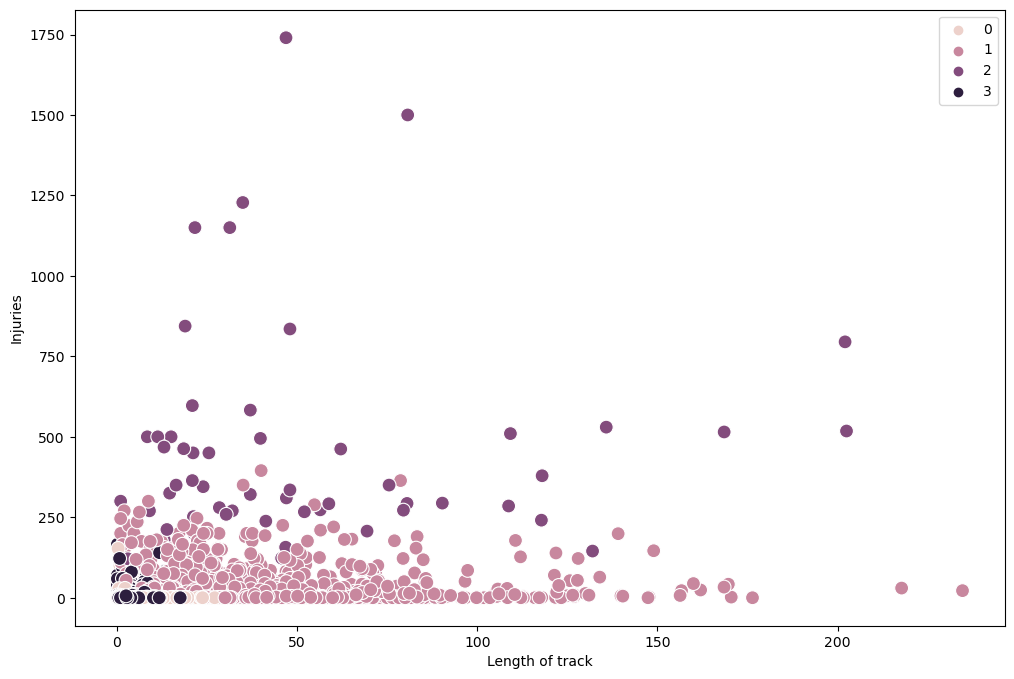

In [44]:
# Plotting the clusters for the "Length of track" and "Injuries" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length of track'], y=df['Injuries'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of track') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.show()

In this scatterplot, we can see again that tornados from cluster 2 are the ones that cause the most injuries, relatively independent of their length of track. Tornados from cluster 1 have almost the same range of length but in most cases they cause fewer injuries, and the injuries are also relatively independent of the tornado's length of track. And again, tornados from cluster 0 and 3 have a small length of track and cause relatively little injuries. 

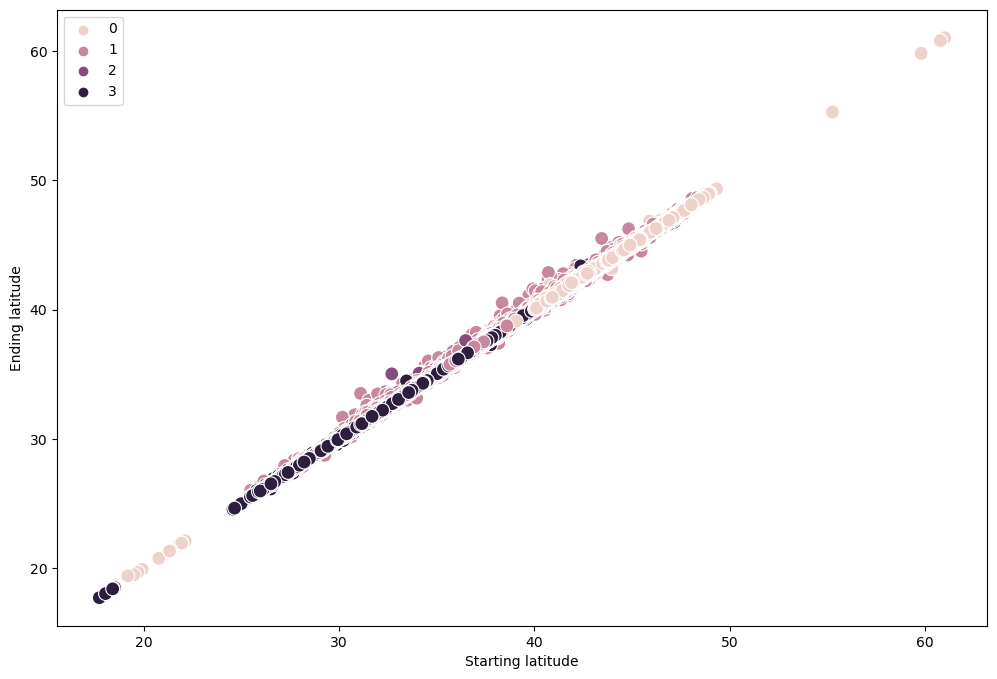

In [45]:
# Plotting the clusters for the "Starting latitude" and "Ending latitude" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Starting latitude'], y=df['Ending latitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Starting latitude') # Label x-axis.
plt.ylabel('Ending latitude') # Label y-axis.
plt.show()

This scatterplot shows that tornados from cluster 0 and 3 (relatively mild tornados) cover a range of different latitudes which corresponds to the whole US, with a small exception around about 23/24 degrees north latitude and an exception between around 50 and 60 degrees north latitude which corresponds to Canada. Most tornados (including the more severe ones) occur between about 31 and 43 degrees north latitude which corresponds to the southern part of the US.

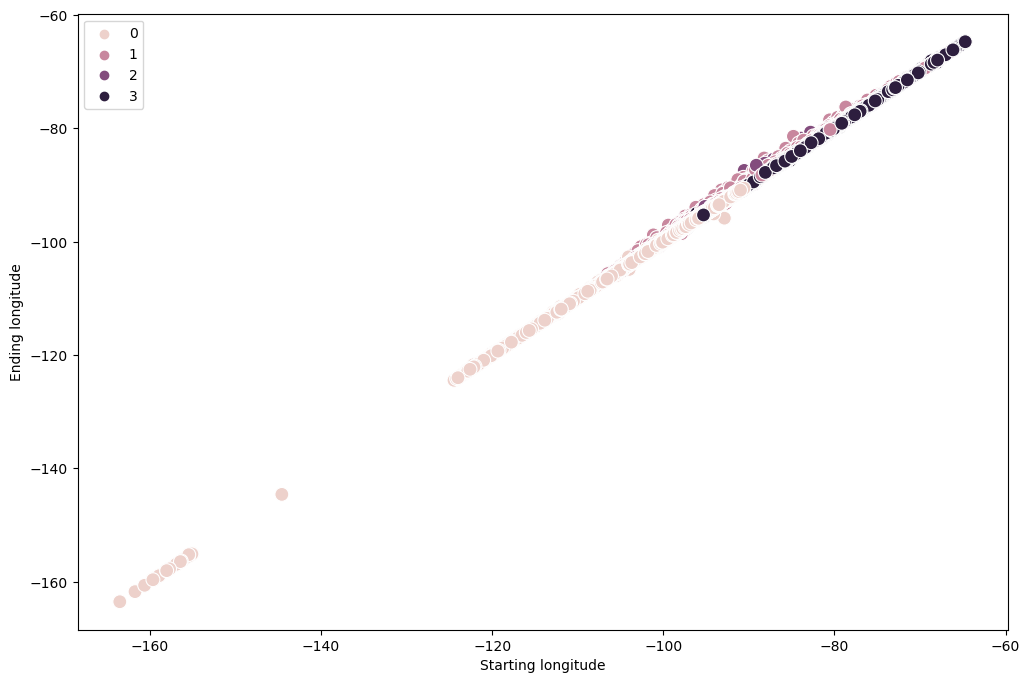

In [46]:
# Plotting the clusters for the "Starting longitude" and "Ending longitude" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Starting longitude'], y=df['Ending longitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Starting longitude') # Label x-axis.
plt.ylabel('Ending longitude') # Label y-axis.
plt.show()

Here, we can see again that relatively mild tornados (from cluster 0 and 3) span the whole US from east to west (including Hawaii) with an exception of the Pacific Ocean (longitude -120 to about -153). Interestingly, tornados from cluster 0 make up the mild tornados of the west, and tornados from cluster 3 make up the mild tornados from the east. Most tornados, including the severe ones, occur between 70 and 100 degrees east longitude which makes sense because it corresponds to the mid west. 

## Step 9: Calculating the descriptive statistics for your clusters using the groupby() function and discussing your findings

In [47]:
df.groupby('Cluster').agg({'Injuries':['mean', 'median'], 
                         'Fatalities':['mean', 'median'], 
                         'Starting latitude':['mean', 'median'],
                          'Starting longitude':['mean', 'median'],
                            'Ending latitude':['mean', 'median'],
                          'Ending longitude':['mean', 'median'],
                            'Length of track':['mean', 'median'],
                          'Width ':['mean', 'median'],
                            'Magnitude': ['mean', 'median']})

Injuries        Fatalities        Starting latitude           \
               mean median       mean median              mean   median   
Cluster                                                                   
0          0.230420    0.0   0.007797    0.0         40.284530  40.3965   
1         11.883291    0.0   0.798209    0.0         36.743227  35.9500   
2        459.872727  345.0  37.236364   29.0         36.804615  36.4830   
3          0.693907    0.0   0.030355    0.0         34.053814  33.5843   

        Starting longitude          Ending latitude          Ending longitude  \
                      mean   median            mean   median             mean   
Cluster                                                                         
0               -98.310939 -98.0800       40.513322  40.5600       -97.920493   
1               -91.901353 -92.2000       36.930868  36.1316       -91.477718   
2               -89.382673 -88.1479       37.234006  36.9019       -88.662909   
3               -87.300690 -87.1200       34.353787  34.0700       -87.119477   

                  Length of track             Width         Magnitude         
           median            mean median        mean median      mean median  
Cluster                                                                       
0       -97.58870        2.013038    0.5   59.436468   30.0  0.574344    0.0  
1       -91.76705       24.062628   18.0  694.739435  600.0  2.247480    2.0  
2       -87.23500       53.213273   37.0  859.854545  600.0  4.381818    4.0  
3       -87.08000        2.563607    1.0   87.136265   50.0  0.814026    1.0

This table shows the differences between the clusters that we already have seen in the scatterplots. Here, we can see more clearly that tornados from cluster 0 have the smallest length, width and magnitude, followed by tornados from cluster 3, 1 and 2. Interestingly, the differences between cluster 0, 1 and 3 are minor to non-existent when comparing the number of fatalities and injuries (except for the mean of cluster 1 but not the median). However, cluster 2 really stands out with high numbers of fatalities and injuries (mean and median). 

## Step 10: Proposing what these results could be useful for in future steps of an analytics pipeline

We saw four clusters of tornados, with cluster 0 including tornados with the smallest length of track, width and magnitude,  followed by tornados from cluster 3, 1 and 2 with increasingly higher length of track, width and magnitude. Tornados of cluster 2 are by far the most devastating in terms of injuries and fatalities. Tornados from cluster 0 occur in the western part of the US, whereas tornados from cluster 3 occur in the eastern aprt of the US.
Maybe this clustering will be useful in further time series analysis. 